['None', 'natsdorf', 'GallowBoob', 'dickfromaccounting', 'namraka', 'SlimJones123', 'IHaeTypos', 'Fizrock', 'ImmunosuppressivePip', 'unknown_human', 'JF_112', 'D5R', 'Two_Inches_Of_Fun', 'TooShiftyForYou', 'Jamtonisalon', 'gangbangkang', 'dareeza', 'lessons_learnt', 'Obito_GF', 'OtherJaffa']
2.032258064516129
0.125


['a2s', 3.875, 2.4475806451612905, 5, 0.0, 0.0]

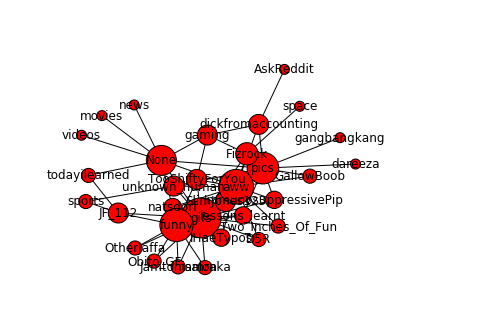

In [7]:
import json
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import time
import scipy as sp
import numpy as np
from pprint import pprint
import operator
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline


from networkx.readwrite import json_graph

def read_json_file(filename):
    with open(filename) as f:
        data = json.load(f)
        return data

#hot10_data = read_json_file("hot100_data.json")
#d_graph = make_data_graph(hot10_data)
#nx.draw(d_graph, with_labels=True, node_size = 1000, width = 10)

top1000_data = read_json_file("top1000_data.json")

author_dict = get_top_authors(top1000_data)
top_authors = []

for entry in author_dict:
    top_authors.append(entry[0])
    
print(top_authors)

auth_to_sub = top_authors_to_subreddit(top1000_data, top_authors)

#print(nx.betweeness_centrality(auth_to_sub))
print(nx.average_node_connectivity(auth_to_sub))
print(nx.density(auth_to_sub))

get_graph_stats(auth_to_sub, "a2s")

#print(nx.average_degree_connectivity(auth_to_sub))


#sort_authors = sorted(author_dict.items(), key=operator.itemgetter(1), reverse = True)


In [5]:
def get_graph_stats(G, name):
    stats_list = []
    stats_list.append(name)
    stats_list.append(average_degree(G))
    stats_list.append(nx.average_shortest_path_length(get_largest_component(G)))
    stats_list.append(nx.diameter(get_largest_component(G)))
    stats_list.append(nx.transitivity(G))
    stats_list.append(nx.average_clustering(G))
    
    return stats_list

# Get the average degree of the graph
def average_degree(G):
    deg_sum = 0
    node_count = 0
    # For every node in the graph
    for node in G.nodes():
        # Get it's degree and add it to the total sum
        deg_sum += G.degree(node)
        # Increment the node count
        node_count += 1
    # Return the average
    return deg_sum/node_count

# Find the largest connected component of a graph
def get_largest_component(G):
    component_list = sorted(nx.connected_component_subgraphs(G), key = len, reverse = True)
    # Return the first item, which should be the largest
    return component_list[0]

In [6]:
def top_authors_to_subreddit(data, top_authors):
    top_graph = nx.Graph()
    subreddits = []
    authors = []
    for submission in data:
        sub_author = submission["author"]
        # If the author is one of the top ones
        if (sub_author in top_authors):
            if (sub_author == "JPTIII"):
                continue
            # If a node for them hasn't been created yet
            if (sub_author not in authors):
                top_graph.add_node(sub_author)
                authors.append(sub_author)
                
            # If the subreddit hasn't been seen before
            if (submission["subreddit"] not in subreddits):
                top_graph.add_node(submission["subreddit"])
                subreddits.append(submission["subreddit"])
        
            top_graph.add_edge(submission["author"], submission["subreddit"])
                    
    #nx.draw(top_graph, with_labels=True)
    
    d = nx.degree(top_graph)
    
    nx.draw(top_graph, nodelist=d.keys(), node_size=[v * 100 for v in d.values()], with_labels = True)
    pos = nx.drawing.spring_layout(top_graph,k=0.9,iterations=500)
    
    #pos = nx.drawing.spring_layout(top_graph)
    return top_graph
      

In [4]:
def make_data_graph(data):
    data_graph = nx.Graph()
    subreddits = []
    authors = []
    for submission in data:
        sub_author = submission["author"]
        subreddit = submission["subreddit"]
        if sub_author not in authors:
            data_graph.add_node(sub_author)
            authors.append(sub_author)
        if subreddit not in subreddits:
            data_graph.add_node(subreddit, node_color = 'b')
            subreddits.append(subreddits)
            
        data_graph.add_edge(sub_author, subreddit)
        
    return data_graph

def get_top_authors(data):
    authors = {}
    for submission in data:
        sub_author = submission["author"]
        if sub_author not in authors:
            authors[sub_author] = 1
        else:
            authors[sub_author] += 1
    sort_authors = sorted(authors.items(), key=operator.itemgetter(1), reverse = True)
    
    top_authors = []
    i = 0 
    for entry in sort_authors:
        if i == 20:
            break
        else:
            top_authors.append(entry)
            i += 1
    return top_authors